In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

In [2]:
nota = pd.read_csv('ratings.csv')

## **Dataset Avaliações**

In [3]:
nota.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
nota.shape

(100836, 4)

In [5]:
nota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
# Verificando Valores unicos contidos na coluna
nota['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
nota['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [8]:
# media das Notas
print(nota['rating'].mean())
print(nota['rating'].median())

3.501556983616962
3.5


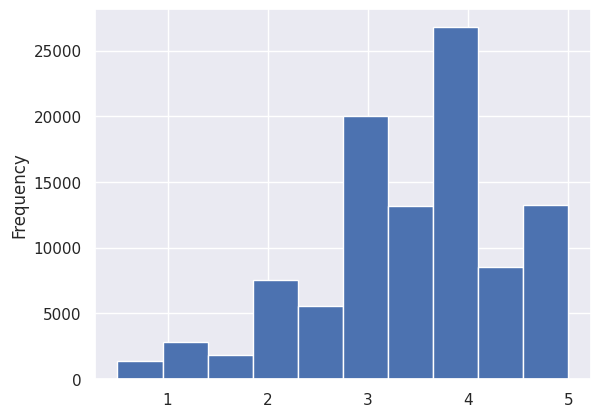

In [9]:
nota['rating'].plot(kind= 'hist');

In [10]:
nota['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

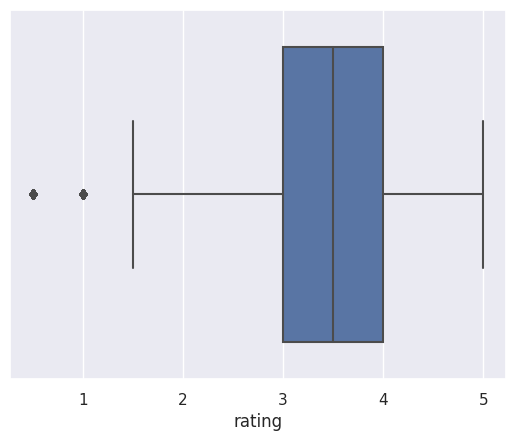

In [11]:
sns.boxplot(x= nota['rating']);

## **Dataset Filmes**

In [12]:
filmes = pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
nota.groupby('movieId').mean()

,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


## DatasSet TMDB

In [14]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [15]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [16]:
# Contanto as categorias - Transformando a Serie em DF - Resetando Index para ter duas colunas
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()

# Renomeando as colunas
contagem_de_lingua.columns = ['original_langage', 'total'] 
contagem_de_lingua.head()

,original_langage,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


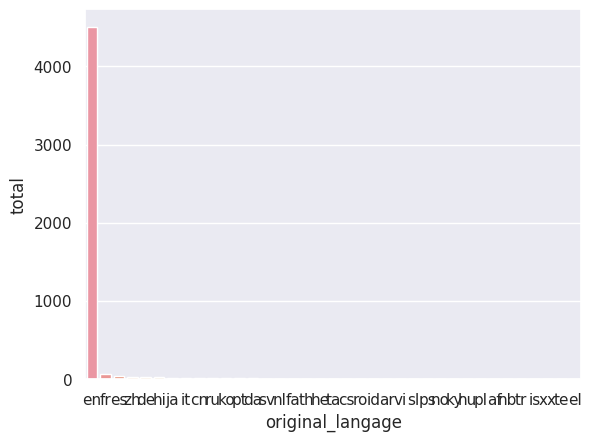

In [17]:
# Gráfico ficou uma merda para interpretar
sns.barplot(data = contagem_de_lingua, x= 'original_langage', y='total' );

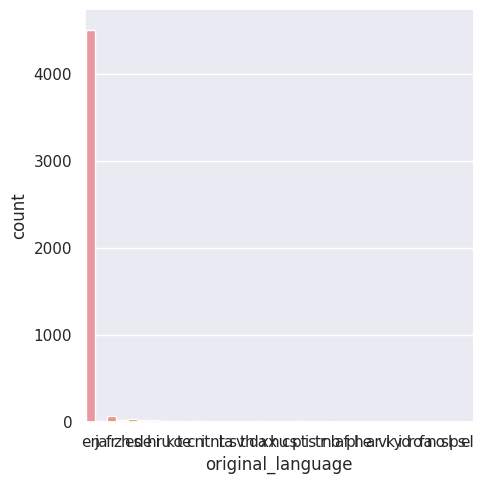

In [25]:
sns.catplot(data = tmdb, x = 'original_language', kind = 'count');

In [34]:
# Para que a visualização anterior faça algum sentido, é mais prudenten compara o ingles com as demais linguas
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_resto = total_geral - total_ingles
print(total_resto, total_ingles)

298 4505


In [39]:
dados = {
    'lingua': ['ingles', 'geral'],
    'qtd': [total_ingles, total_resto]
}

dados = pd.DataFrame(dados)

dados

,lingua,qtd
0,ingles,4505
1,geral,298


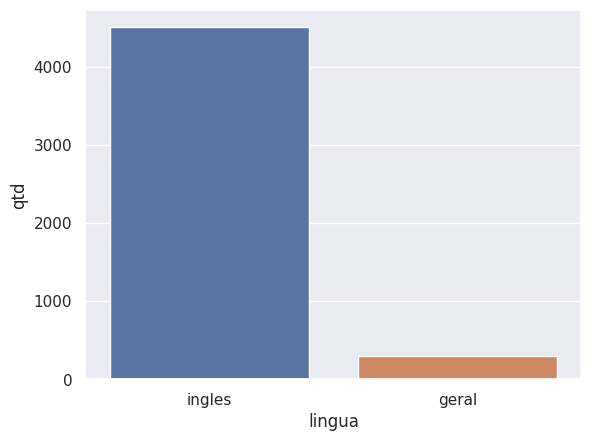

In [41]:
sns.barplot(data = dados, x = 'lingua', y = 'qtd');

### **Definindo a Ordem dos Dados nos Gráficos**

In [69]:
# Pegando dados que não tem  igles como lingua orginal
sem_ingles = tmdb[tmdb['original_language'] != 'en']

# Fazendo a soma para passar como parametro para o grafico
# Com isso consigo deixar a exibição na ordem que eu bem entender
total_sem_ingles = sem_ingles['original_language'].value_counts().to_frame()


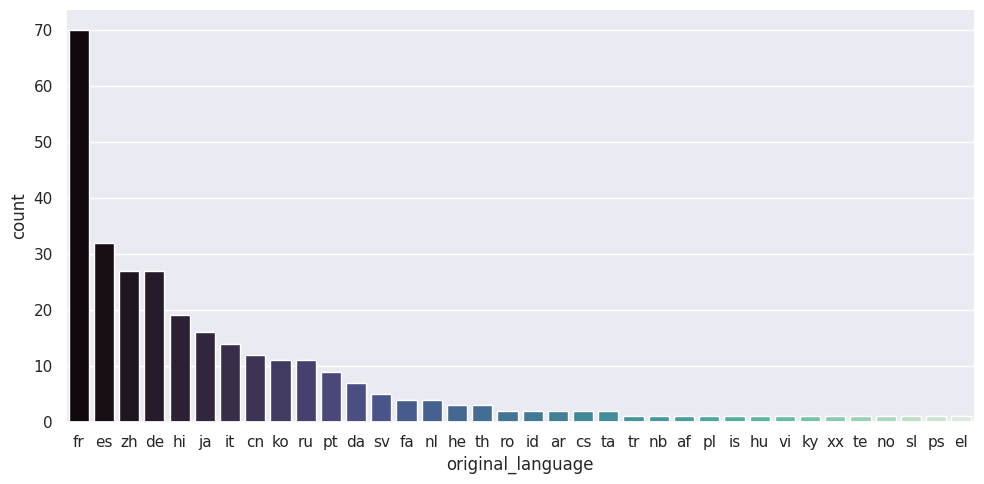

In [73]:
# Documentação de Cores Seaborn
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.catplot(data= sem_ingles, x = 'original_language', kind = 'count', 
            aspect = 2, order = total_sem_ingles.index, palette= 'mako');